# 이미지 설명 요청하기

## 인터넷에 있는 이미지 사진 설명 요청하기
- 원하는 이미지 링크 사용
- 단, API 호출을 통해 서버에 접근 가능한 이미지 링크를 사용하기
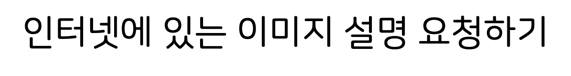

In [9]:
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("OPEN_API_KEY")  # 환경 변수에서 API 키를 가져오기

client = OpenAI(api_key=api_key)  # 오픈AI 클라이언트의 인스턴스 생성

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "이 이미지에 대해 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": "https://recipe1.ezmember.co.kr/cache/recipe/2016/06/05/1ba7e34cf0daf694f09a3a9539ebdb161.jpg",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",  # 응답 생성에 사용할 모델 지정
    messages=messages # 대화 기록을 입력으로 전달
)

response


ChatCompletion(id='chatcmpl-CQHWyZ5xLIA2p3dAdSEgngf52aTeH', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='이 이미지는 오므라이스 요리를 보여주고 있습니다. 오므라이스는 얇게 부친 달걀로 감싼 볶음밥 요리입니다. 위에는 케첩이 선 모양으로 뿌려져 있고, 옆에는 브로콜리와 얇게 썬 사과가 곁들여져 있습니다. 볶음밥에는 햄이나 야채가 들어 있는 것으로 보입니다.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None, annotations=[]))], created=1760379952, model='gpt-4o-2024-08-06', object='chat.completion', service_tier='default', system_fingerprint='fp_159664a9b7', usage=CompletionUsage(completion_tokens=99, prompt_tokens=779, total_tokens=878, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

## 내가 가진 이미지로 설명 요청하기

### base64 인코딩
- 바이너리 데이터 HTTP Request 전송을 위해 인코딩 진행

In [11]:
import base64

# Function to encode the image
def encode_image(path):
    with open(path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
    
image_path = "./data/mart.jpg"

# 이미지를 base64로 인코딩
base64_image = encode_image(image_path)

print(base64_image[0:100])

/9j/4AAUSkZJRgABAQEBLAEsAABBTVBG/+EJxEV4aWYAAE1NACoAAAAIAA0BDwACAAAABgAAAKoBEAACAAAACgAAALABEgADAAAA


### GPT API 호출 및 결과 출력

In [12]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "이 이미지에 대해 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",  # 응답 생성에 사용할 모델 지정
    messages=messages # 대화 기록을 입력으로 전달
)

response.choices[0].message.content

'이미지에는 다양한 인스턴트 라면과 컵라면들이 진열되어 있습니다. 왼쪽 상자에는 빨간 포장의 봉지 라면들이 쌓여 있고, 오른쪽 선반에는 컵라면들이 주로 진열되어 있습니다. 컵라면의 뚜껑에는 "LAU THAI TOM"이라는 문구가 보입니다. 하단 선반에는 묶음으로 포장된 면류가 놓여 있습니다. 전반적으로 다양한 아시아 식품들이 배치된 작은 식품점의 일부로 보입니다.'

### 여러 이미지 비교 분석 요청

In [13]:
red_dumpling_base64 = encode_image("data/red_dumpling.jpeg")
dumpling_soup_base64 = encode_image("data/dumpling_soup.jpeg")

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "두 음식의 차이점을 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{red_dumpling_base64}",
                },
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{dumpling_soup_base64}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",  # 응답 생성에 사용할 모델 지정
    messages=messages # 대화 기록을 입력으로 전달
)

response.choices[0].message.content

'이 두 음식은 모두 만두를 사용한 요리입니다. \n\n1. 첫 번째 사진:\n   - **소스**: 빨간 매운 소스에 만두가 담겨 있습니다. 아마도 중국식 매운 소스일 가능성이 큽니다.\n   - **조리법**: 매콤한 소스를 사용하여 맵고 자극적인 맛이 특징입니다.\n\n2. 두 번째 사진:\n   - **국물**: 맑은 국물에 만두가 담겨 있으며, 계란 지단과 같이 국물 속에 재료가 들어 있습니다.\n   - **조리법**: 국물이 있는 형태로, 부드럽고 담백한 맛이 특징입니다.\n\n두 요리는 조리방식과 소스/국물로 인해 맛과 향이 크게 다를 것입니다.'

## GPT 비전의 한계 알아보기

In [14]:
oecd_rnd_2021_base64 = encode_image("./data/oecd_rnd_2021_large.png")
oecd_rnd_2022_base64 = encode_image("./data/oecd_rnd_2022_large.png")

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "첫번째는 2021년 데이터이고, 두번째는 2022년 데이터입니다. 이 데이터에 대해 설명해주세요. 어떤 변화가 있었나요? 한국 중심으로 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2021_base64}",
                },
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2022_base64}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",  # 응답 생성에 사용할 모델 지정
    messages=messages # 대화 기록을 입력으로 전달
)

response.choices[0].message.content


'이 데이터를 통해 2021년과 2022년 사이의 연구개발비(R&D)와 GDP 대비 연구개발비 비중의 변화를 살펴볼 수 있습니다. 여기서는 한국을 중심으로 설명하겠습니다.\n\n1. **연구개발비**:\n   - **2021년**: 한국의 연구개발비는 약 89,282백만 US달러입니다.\n   - **2022년**: 한국의 연구개발비는 약 91,013백만 US달러로 증가하였습니다.\n\n2. **GDP 대비 연구개발비 비중**:\n   - **2021년**: 한국의 비중은 4.93%입니다.\n   - **2022년**: 한국의 비중은 4.93%에서 5.21%로 증가했습니다.\n\n이를 통해 한국은 경제 성장과 맞물려 연구개발에 대한 투자를 늘리고 있으며, GDP 대비 연구개발비 비중도 증가하고 있습니다. 이는 한국이 지속적으로 연구와 개발에 중점을 두고 있다는 것을 나타냅니다. 다른 국가의 경우도 대체로 소폭의 변화가 있으며, 한국의 비중은 여전히 높은 수준을 유지하고 있습니다.'

In [15]:
oecd_rnd_2021_base64 = encode_image("./data/oecd_rnd_2021_medium.png")
oecd_rnd_2022_base64 = encode_image("./data/oecd_rnd_2022.png")

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "첫번째는 2021년 데이터이고, 두번째는 2022년 데이터입니다. 이 데이터에 대해 설명해주세요. 어떤 변화가 있었나요? 한국 중심으로 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2021_base64}",
                },
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2022_base64}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",  # 응답 생성에 사용할 모델 지정
    messages=messages # 대화 기록을 입력으로 전달
)

response.choices[0].message.content

'이 두 데이터는 각국의 연구개발비와 GDP 대비 연구개발비 비중을 보여주고 있습니다. 한국에 대한 변화는 다음과 같습니다:\n\n1. **연구개발비(백만 US달러):**\n   - 2021년 데이터: 121,739백만 US달러\n   - 2022년 데이터: 133,867백만 US달러\n   - **변화:** 한국의 연구개발비는 증가했습니다.\n\n2. **GDP 대비 연구개발비 비중(%):**\n   - 2021년: 4.93%\n   - 2022년: 4.93%\n   - **변화:** 비중에는 큰 변화가 없습니다.\n\n3. **일반적인 경향:**\n   - 전체적으로 연구개발비가 증가한 것을 볼 수 있으며, 한국은 여전히 높은 수준을 유지하고 있습니다. 한국의 연구개발 지출은 여전히 GDP의 큰 비중을 차지합니다.\n\n이 데이터는 한국이 지속적으로 연구개발에 집중하고 있으며, 이러한 투자를 통해 기술 혁신과 성장을 추구하는 것을 보여줍니다.'